# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
# loading dataset and reading it
data = pd.read_csv("stock_dataset.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# EDA

In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
data.shape

(2035, 8)

In [7]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


# Visualizations

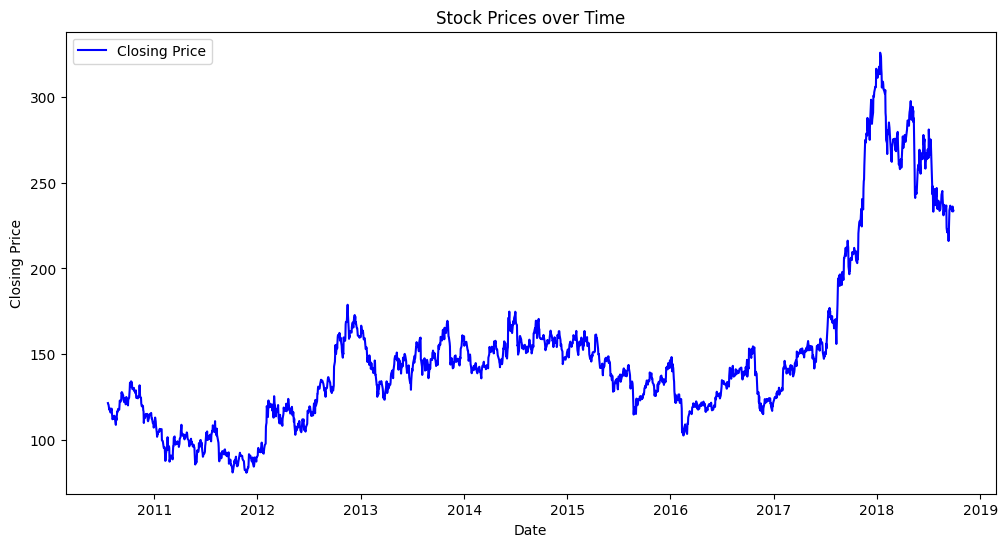

In [13]:
# Line chart to visualize stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='b')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices over Time')
plt.legend()
plt.show()

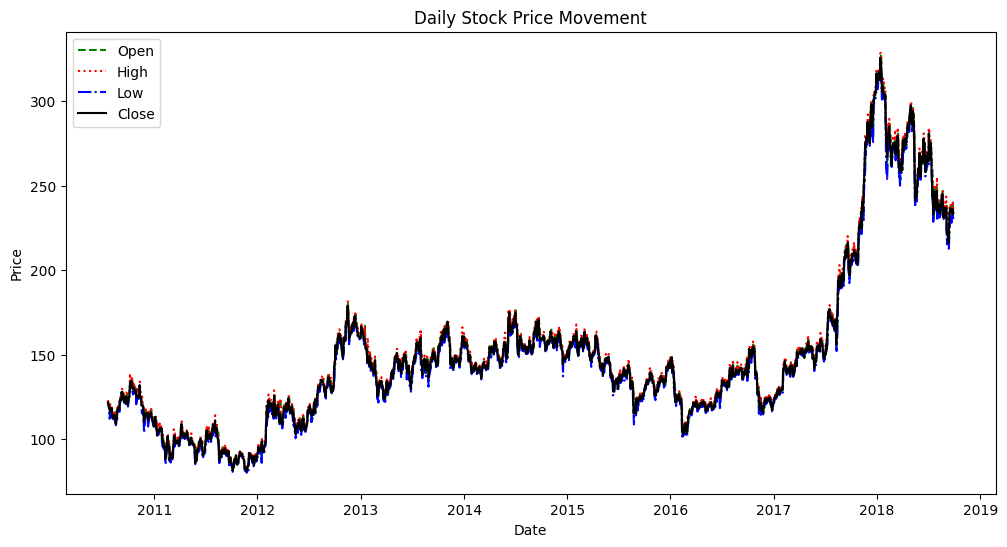

In [14]:
# Candlestick plot for daily stock price movement
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Open', color='g', linestyle='--')
plt.plot(data['Date'], data['High'], label='High', color='r', linestyle=':')
plt.plot(data['Date'], data['Low'], label='Low', color='b', linestyle='-.')
plt.plot(data['Date'], data['Close'], label='Close', color='k', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Stock Price Movement')
plt.legend()
plt.show()

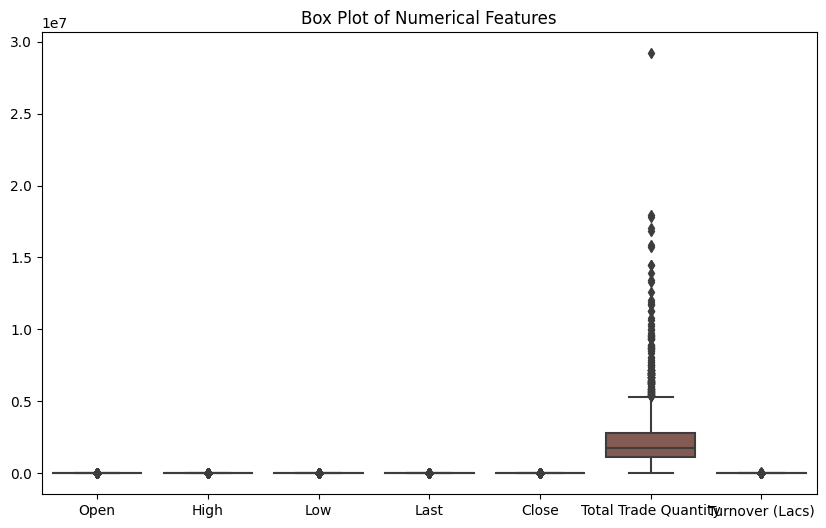

In [15]:
# Box plot to identify outliers and distribution of numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']])
plt.title('Box Plot of Numerical Features')
plt.show()

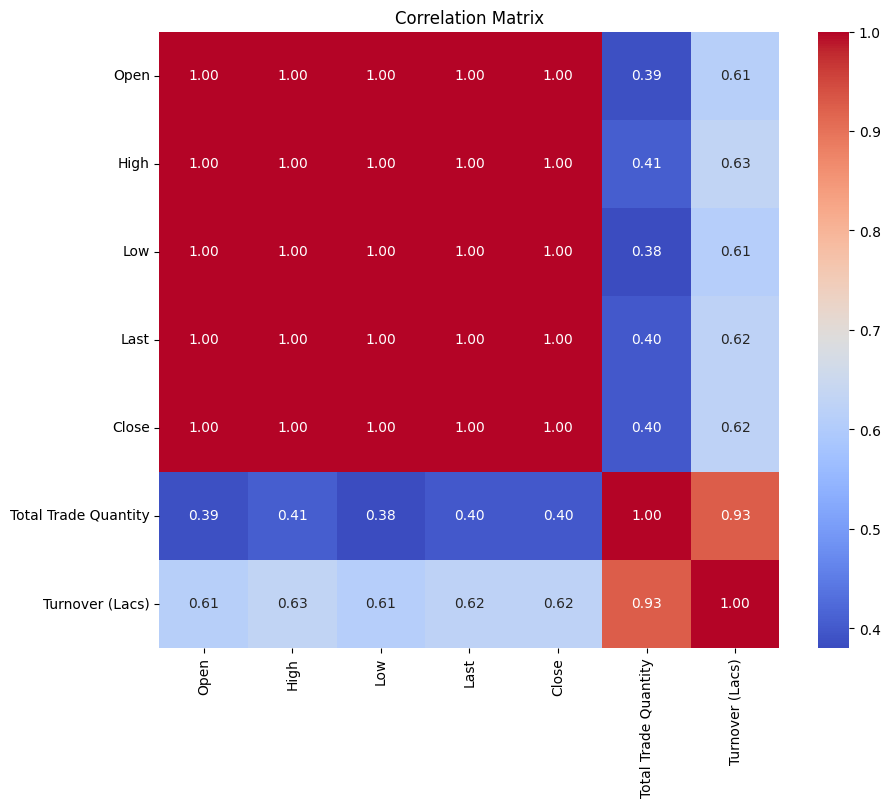

In [16]:
# Calculate the correlation matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Performing ML Models

In [17]:
# Select the features and target
features = ['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)']
target = 'Close'

X = data[features].values
y = data[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
train_rmse_linear = mean_squared_error(y_train, y_train_pred_linear, squared=False)
test_rmse_linear = mean_squared_error(y_test, y_test_pred_linear, squared=False)
train_r2_linear = r2_score(y_train, y_train_pred_linear)
test_r2_linear = r2_score(y_test, y_test_pred_linear)

print("Linear Regression Results:")
print(f"Train RMSE: {train_rmse_linear:.2f}, Train R^2: {train_r2_linear:.2f}")
print(f"Test RMSE: {test_rmse_linear:.2f}, Test R^2: {test_r2_linear:.2f}")

Linear Regression Results:
Train RMSE: 0.40, Train R^2: 1.00
Test RMSE: 0.40, Test R^2: 1.00


C:\Users\stech\AppData\Local\Temp\ipykernel_8840\597891835.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_rf, y_train_rf)


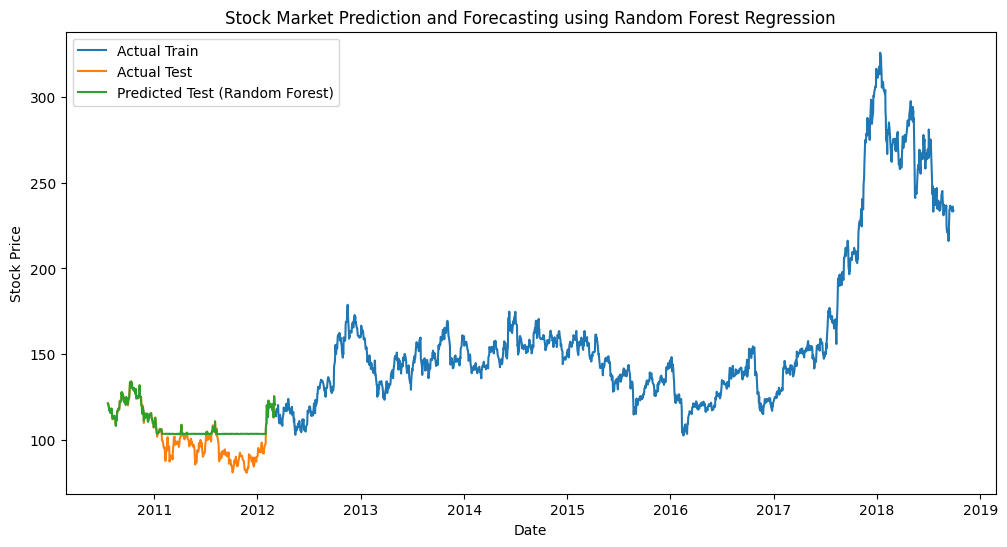

In [18]:
# Select the features and target
features = ['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)']
target = 'Close'

X = data[features].values
y = data[target].values

# Reshape y to a 2D array
y = y.reshape(-1, 1)

# Normalize the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
train_size = int(len(X_scaled) * 0.8)
X_train_rf, X_test_rf = X_scaled[:train_size], X_scaled[train_size:]
y_train_rf, y_test_rf = y_scaled[:train_size], y_scaled[train_size:]

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_rf)
y_test_pred_rf = rf_model.predict(X_test_rf)

# Inverse transform the predictions to get actual values
y_train_pred_rf = scaler.inverse_transform(y_train_pred_rf.reshape(-1, 1)).flatten()
y_test_pred_rf = scaler.inverse_transform(y_test_pred_rf.reshape(-1, 1)).flatten()

# Plot Random Forest Regression Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][:train_size], y[:train_size], label="Actual Train")
plt.plot(data['Date'][train_size:], y[train_size:], label="Actual Test")
plt.plot(data['Date'][train_size:], y_test_pred_rf, label="Predicted Test (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Market Prediction and Forecasting using Random Forest Regression")
plt.legend()
plt.show()

Epoch 1/100
51/51 - 5s - loss: 0.0184 - 5s/epoch - 91ms/step
Epoch 2/100
51/51 - 0s - loss: 9.3673e-04 - 499ms/epoch - 10ms/step
Epoch 3/100
51/51 - 1s - loss: 8.0062e-04 - 538ms/epoch - 11ms/step
Epoch 4/100
51/51 - 0s - loss: 7.9723e-04 - 363ms/epoch - 7ms/step
Epoch 5/100
51/51 - 1s - loss: 7.6971e-04 - 560ms/epoch - 11ms/step
Epoch 6/100
51/51 - 1s - loss: 7.7798e-04 - 632ms/epoch - 12ms/step
Epoch 7/100
51/51 - 1s - loss: 8.3815e-04 - 552ms/epoch - 11ms/step
Epoch 8/100
51/51 - 1s - loss: 7.2627e-04 - 599ms/epoch - 12ms/step
Epoch 9/100
51/51 - 1s - loss: 7.2058e-04 - 551ms/epoch - 11ms/step
Epoch 10/100
51/51 - 1s - loss: 6.9935e-04 - 519ms/epoch - 10ms/step
Epoch 11/100
51/51 - 0s - loss: 7.5862e-04 - 415ms/epoch - 8ms/step
Epoch 12/100
51/51 - 1s - loss: 8.2804e-04 - 583ms/epoch - 11ms/step
Epoch 13/100
51/51 - 1s - loss: 6.3890e-04 - 565ms/epoch - 11ms/step
Epoch 14/100
51/51 - 1s - loss: 6.5361e-04 - 537ms/epoch - 11ms/step
Epoch 15/100
51/51 - 0s - loss: 6.1529e-04 - 411ms/e

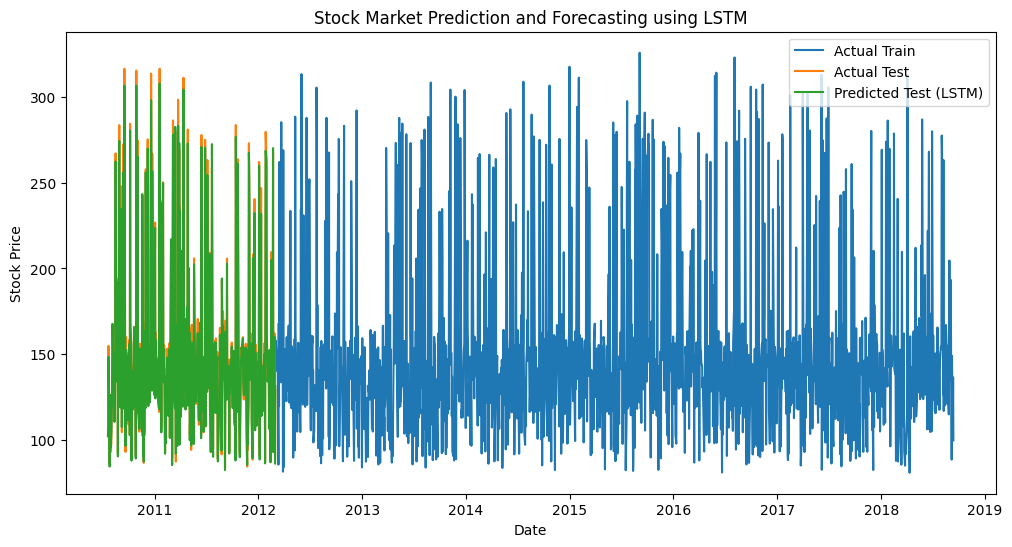

In [19]:
# LSTM Model
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# Create LSTM dataset with sequence length (look_back)
look_back = 10
X_lstm, y_lstm = create_sequences(y_scaled, look_back)

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, X_train_lstm.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, verbose=2)

# Make predictions
y_train_pred_lstm = model.predict(X_train_lstm)
y_test_pred_lstm = model.predict(X_test_lstm)

# Define train_size and adjust the date ranges for plotting LSTM
train_size = len(y_train_lstm)
test_start = train_size + look_back

# Inverse transform the predictions to get actual values
y_train_pred_lstm = scaler.inverse_transform(y_train_pred_lstm)
y_test_pred_lstm = scaler.inverse_transform(y_test_pred_lstm)
y_train_lstm = scaler.inverse_transform(y_train_lstm.reshape(-1, 1)).flatten()
y_test_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()

# Plot LSTM Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][look_back:look_back+train_size], y_train_lstm, label="Actual Train")
plt.plot(data['Date'][test_start:], y_test_lstm, label="Actual Test")
plt.plot(data['Date'][test_start:], y_test_pred_lstm, label="Predicted Test (LSTM)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Market Prediction and Forecasting using LSTM")
plt.legend()
plt.show()